In [104]:
# import libraries
import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns


# The number of unique identifiers for CustomerID and ProductID
num_of_customer_ids = 40
num_of_product_ids = 95
total_rows = 2000  # number of rows in Data set

# The period of time
start_date = '2024-01-01'
end_date = '2024-06-30'

# Function to generate random alphanumeric identifiers for CustomerID
def generate_identifier(length, num_ids):
    alphanumeric = string.ascii_letters + string.digits
    return [''.join(random.choice(alphanumeric) for _ in range(length)) for _ in range(num_ids)]

# Function to generate random numeric identifiers for ProductID
def generate_identifier_2(length, num_ids):
    numeric = string.digits
    return [''.join(random.choice(numeric) for _ in range(length)) for _ in range(num_ids)]

# Generate unique CustomerIDs and ProductIDs
unique_customer_ids = generate_identifier(8, num_of_customer_ids)
unique_product_ids = generate_identifier_2(5, num_of_product_ids)

# Random prices with two decimal places
prices = np.round(np.random.uniform(1, 100, total_rows), 2)

# A dictionary with the data
data = {
    'TransactionID': np.arange(1, total_rows + 1),  
    'Date': pd.to_datetime([random.choice(pd.date_range(start_date, end_date)) for _ in range(total_rows)]),
    'CustomerID': np.random.choice(unique_customer_ids, total_rows),
    'ProductID': np.random.choice(unique_product_ids, total_rows),
    'Quantity': np.random.randint(1, 100, size=total_rows),
    'Price': prices
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

In [106]:
# adding new colum TotalAmount
df['TotalAmount'] = df['Price'] * df['Quantity']

In [86]:
df.head()

,TransactionID,Date,CustomerID,ProductID,Quantity,Price,TotalAmount
0,1,2024-01-10,3Dpp2FCV,44002,73,24.91,1818.43
1,2,2024-06-29,0gZW8LGG,41319,42,41.61,1747.62
2,3,2024-03-28,B7CuSUSU,64354,17,94.42,1605.14
3,4,2024-06-05,wKNDUidd,24112,60,26.72,1603.20
4,5,2024-06-03,vpgVDvTI,60785,67,93.35,6254.45


In [6]:
# Saving data set in Excel
df.to_excel('dataset.xlsx', index=False)

In [8]:
# Descriptive statistic
df.describe()

,TransactionID,Date,Quantity,Price,TotalAmount
count,2000.000000,2000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2024-03-31 09:54:43.200000,50.505500,50.712360,2542.280695
min,1.000000,2024-01-01 00:00:00,1.000000,1.080000,4.450000
25%,500.750000,2024-02-14 00:00:00,27.000000,25.905000,749.985000
50%,1000.500000,2024-03-31 00:00:00,50.000000,50.490000,1967.320000
75%,1500.250000,2024-05-16 00:00:00,75.000000,75.240000,3857.300000
max,2000.000000,2024-06-30 00:00:00,99.000000,99.990000,9772.560000
std,577.494589,NaN,28.313385,28.662142,2159.583374


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  2000 non-null   int32         
 1   Date           2000 non-null   datetime64[ns]
 2   CustomerID     2000 non-null   object        
 3   ProductID      2000 non-null   object        
 4   Quantity       2000 non-null   int32         
 5   Price          2000 non-null   float64       
 6   TotalAmount    2000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 93.9+ KB


In [12]:
#Detection of unique product and customer IDs
unique_ProductIDs = df['ProductID'].nunique()
unique_CustomerIDs = df['CustomerID'].nunique()
print ("Amount of unique ProductIDs: ",(unique_ProductIDs))
print ("Amount of unique CustomerIDs: ",(unique_CustomerIDs))

Amount of unique ProductIDs:  95
Amount of unique CustomerIDs:  40


In [14]:
# Calculation of total sales and average sales per transaction
TotalAmount_sum = df['TotalAmount'].sum()
TotalAmount_avg = df['TotalAmount'].mean()
print ("Total Sales:",(TotalAmount_sum))
print ("Average sales per transaction:",(round(TotalAmount_avg,2)))

Total Sales: 5084561.390000001
Average sales per transaction: 2542.28


In [16]:
df['Date'] = pd.to_datetime(df['Date']) 
# Seting date as the index
df.set_index(["Date"], inplace=True)

In [18]:
# Monthly sales calculation
monthly_sales = df.resample('M').sum()[['Quantity','TotalAmount']]
monthly_sales['Year'] = monthly_sales.index.year
monthly_sales['Month'] = monthly_sales.index.strftime('%b')
# monthly_sales['YearMonth'] = monthly_sales.index.strftime('%Y-%b')
monthly_sales = monthly_sales[['Year', 'Month', 'Quantity', 'TotalAmount']]
monthly_sales.reset_index(drop=True, inplace=True)
print("Monthly Sales")
print (monthly_sales)

Monthly Sales
   Year Month  Quantity  TotalAmount
0  2024   Jan     17103    841237.99
1  2024   Feb     16869    872597.69
2  2024   Mar     17198    841003.51
3  2024   Apr     17014    851036.53
4  2024   May     15904    817708.97
5  2024   Jun     16923    860976.70


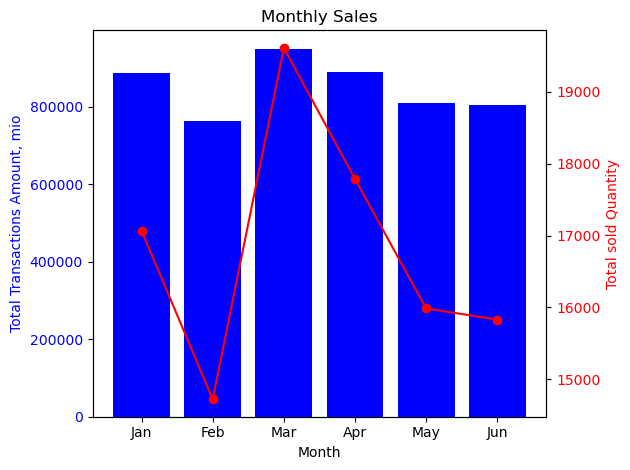

In [344]:
#Visualisation of the monthly turnover by the total amount of the transactions and the quantity of products sold

fig, ax1 = plt.subplots()

ax1.bar(monthly_sales['Month'], monthly_sales['TotalAmount'], color='b', label='Total Amount')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Transactions Amount, mio', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(monthly_sales['Month'], monthly_sales['Quantity'], color='r', marker='o', label='Total sold Quantity')
ax2.set_ylabel('Total sold Quantity', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Sales')
fig.tight_layout()

In [20]:
# Calculation of weekly sales
weekly_sales = df.resample('W').sum()[['Quantity','TotalAmount']]
weekly_sales['Year'] = weekly_sales.index.year
weekly_sales['Week'] = weekly_sales.index.isocalendar().week
weekly_sales = weekly_sales[['Year', 'Week', 'Quantity', 'TotalAmount']]
weekly_sales.reset_index(drop=True, inplace=True)
print("Weekly Sales")
print (weekly_sales.head())

Weekly Sales
   Year  Week  Quantity  TotalAmount
0  2024     1      4308    211096.68
1  2024     2      3202    172922.86
2  2024     3      4679    208972.07
3  2024     4      3317    161769.49
4  2024     5      4128    219276.79


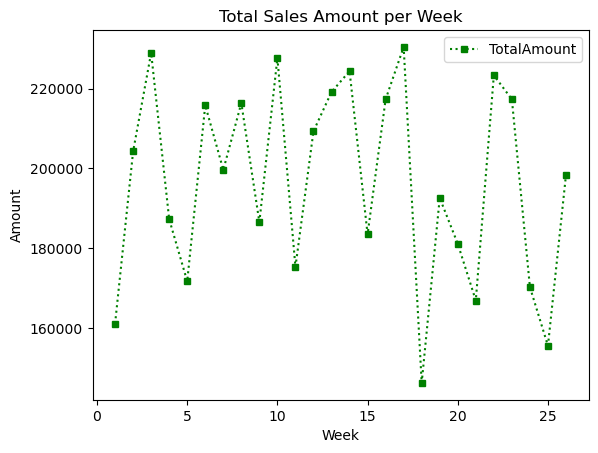

In [350]:
# Visualise sales trends per week
weekly_sales.plot(x="Week", y= "TotalAmount", kind= 'line', marker='s', markersize=5, color='green', linestyle="dotted") #Changing the line style to a Dotted line)
plt.title('Total Sales Amount per Week')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.legend()

In [24]:
# Identification of TOP 5 customers and total amount per customer
CustomerID_counts = df['CustomerID'].value_counts()
top_5_CustomerID_counts = CustomerID_counts.head(5)
top_5_Customers = top_5_CustomerID_counts.index
CustomerID_total_amount = df.groupby('CustomerID')['TotalAmount'].sum()
top_5_Customers_df = pd.DataFrame({
    'CustomerID': top_5_Customers,
    'Total amount of Transactions': CustomerID_total_amount[top_5_Customers].values,
    'Count of Transactions': top_5_CustomerID_counts.values
})
print("TOP 5 Customers")
print(top_5_Customers_df)


TOP 5 Customers
  CustomerID  Total amount of Transactions  Count of Transactions
0   bmZCNf7T                     148706.26                     64
1   2hWu2dLQ                     133725.40                     62
2   2cUo5GOn                     181540.94                     59
3   RnYEk8Pr                     140038.37                     59
4   yuSjRFIq                     143674.29                     58


In [26]:
index=top_5_Customers_df.index
print(index)

RangeIndex(start=0, stop=5, step=1)


In [28]:
top_5_Customers_df_new_index = top_5_Customers_df.set_index('CustomerID')

<Axes: title={'center': 'Top 5 Customers by Total Amount of Transactions'}, xlabel='CustomerID', ylabel='Total amount of Transactions'>

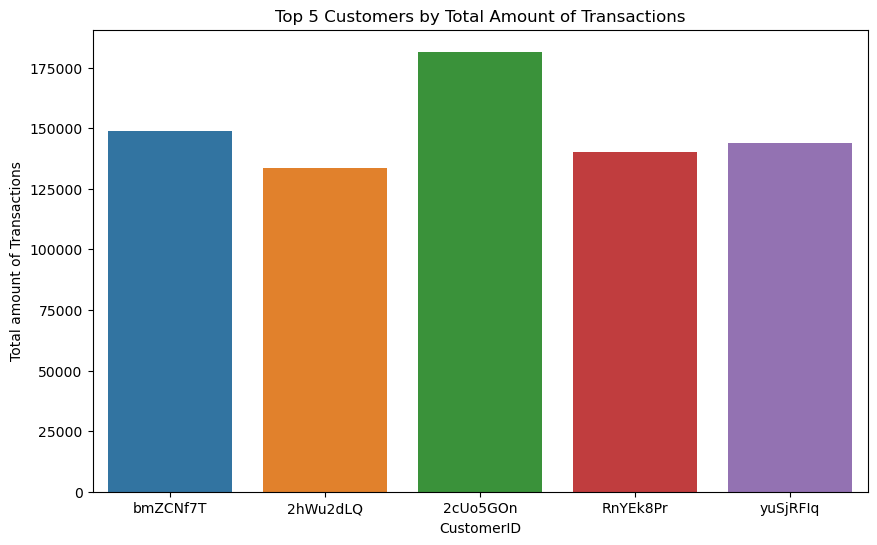

In [32]:
#Visualisation for the top 5 customers by total amount of transactions
plt.figure(figsize=(10,6))
plt.title("Top 5 Customers by Total Amount of Transactions")
sns.barplot(data = top_5_Customers_df, x= "CustomerID" , y= 'Total amount of Transactions')

In [34]:
# Detecting TOP 5 inactive Customers and their Total Amount
CustomerID_counts = df['CustomerID'].value_counts()
inactive_5_CustomerID_counts = CustomerID_counts.tail(5)
inactive_5_Customers = inactive_5_CustomerID_counts.index
CustomerID_total_amount = df.groupby('CustomerID')['TotalAmount'].sum()
inactive_5_Customers_df = pd.DataFrame({
    'CustomerID': inactive_5_Customers,
    'Total amount of Transactions': CustomerID_total_amount[inactive_5_Customers].values,
    'Count of Transactions': inactive_5_CustomerID_counts.values
})
print("TOP 5 less active Customers and Saleas Amounts")
print(inactive_5_Customers_df)

TOP 5 less active Customers and Saleas Amounts
  CustomerID  Total amount of Transactions  Count of Transactions
0   Pd894PKS                     110465.98                     39
1   x6Lnd1GY                      91187.30                     39
2   swY9GuGk                     101529.23                     38
3   sa4KdWCM                     107973.89                     37
4   WhBcVPkf                      74647.04                     36


In [36]:
monthly_data = df.groupby('CustomerID')['TotalAmount'].resample('M').sum().reset_index()
monthly_data['Date'] = monthly_data['Date'].dt.strftime('%Y-%m')
monthly_data = monthly_data[['Date', 'CustomerID', 'TotalAmount']]
CustomerIDs = monthly_data
print("Monthly transactions Amount per Customer")
print(monthly_data)

Monthly transactions Amount per Customer
        Date CustomerID  TotalAmount
0    2024-01   2cUo5GOn     23354.61
1    2024-02   2cUo5GOn     31869.39
2    2024-03   2cUo5GOn     24765.24
3    2024-04   2cUo5GOn     38825.83
4    2024-05   2cUo5GOn     22607.80
..       ...        ...          ...
235  2024-02   zlBIqekC     17200.48
236  2024-03   zlBIqekC      6823.26
237  2024-04   zlBIqekC     25243.17
238  2024-05   zlBIqekC     33844.43
239  2024-06   zlBIqekC     22563.34

[240 rows x 3 columns]


In [38]:
# PIVOT TABLE Grouping customers by monthly total amount and sorting by total amount
monthly_data = df.groupby('CustomerID')['TotalAmount'].resample('M').sum().reset_index(name='TotalAmount')
monthly_data['Date'] = monthly_data['Date'].dt.strftime('%m-%Y')
pivot_table = monthly_data.pivot_table(index='CustomerID', columns ='Date',
                                       values = 'TotalAmount', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)

# Reordering columns to place 'Total' at the end
montly_sales_per_customer = pivot_table[[*pivot_table.columns[:-1], 'Total']]

# Sorting Data Frame by Total
montly_sales_per_customer.sort_values(by='Total', ascending=False, inplace=True)
print("Monthly transactions Amount per Customer")
montly_sales_per_customer.head()

Monthly transactions Amount per Customer


Date,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,Total
CustomerID,,,,,,,
2cUo5GOn,23354.61,31869.39,24765.24,38825.83,22607.80,40118.07,181540.94
noABqZIk,55299.93,25933.97,65109.21,11367.67,17714.51,6020.70,181445.99
g6398bLN,28210.56,37688.31,35869.00,13571.31,32581.94,20751.29,168672.41
mRQkahHG,12248.75,21241.06,39697.79,26602.52,28915.52,35888.82,164594.46
BGb4xa3v,28668.97,24407.97,20303.16,12823.75,30836.51,43819.64,160860.00


In [40]:
#Create df to plot TOP 5 customer sales trends per month
montly_sales_per_customer_TOP5 = montly_sales_per_customer.head()
montly_sales_per_customer_TOP5 = montly_sales_per_customer_TOP5.transpose()
montly_sales_per_customer_TOP5_no_total = montly_sales_per_customer_TOP5.drop("Total")
montly_sales_per_customer_TOP5_no_total

CustomerID,2cUo5GOn,noABqZIk,g6398bLN,mRQkahHG,BGb4xa3v
Date,,,,,
01-2024,23354.61,55299.93,28210.56,12248.75,28668.97
02-2024,31869.39,25933.97,37688.31,21241.06,24407.97
03-2024,24765.24,65109.21,35869.00,39697.79,20303.16
04-2024,38825.83,11367.67,13571.31,26602.52,12823.75
05-2024,22607.80,17714.51,32581.94,28915.52,30836.51
06-2024,40118.07,6020.70,20751.29,35888.82,43819.64


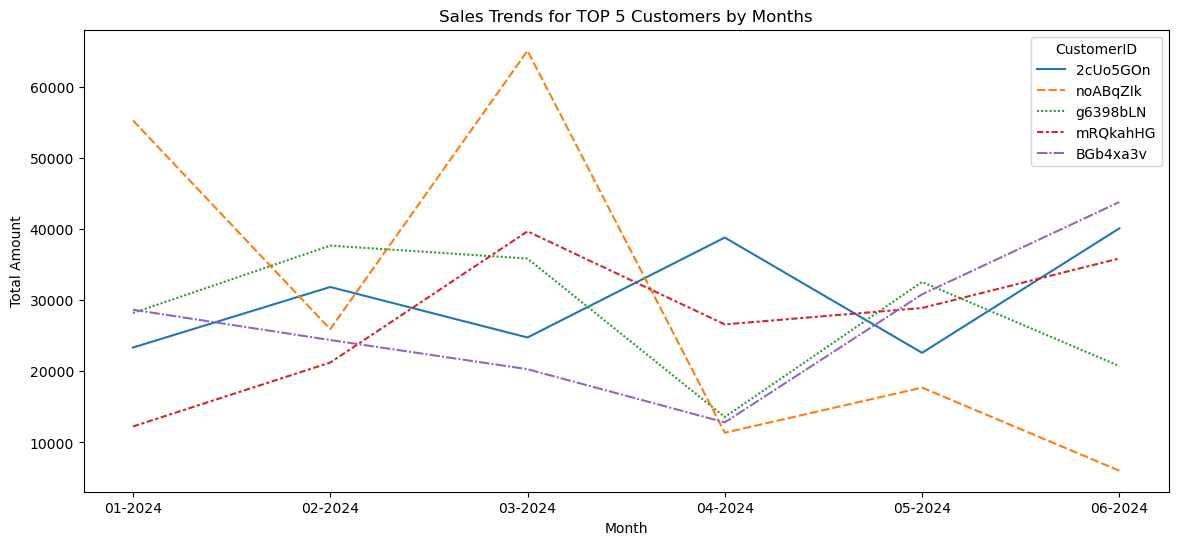

In [42]:
plt.figure(figsize=(14, 6))
plt.title("Sales Trends for TOP 5 Customers by Months")
plt.xlabel('Month')  
plt.ylabel('Total Amount')  
sns.lineplot(data=montly_sales_per_customer_TOP5_no_total)
plt.show()

In [44]:
# PIVOT TABLE Grouping Cutomers by monthly transactions count
monthly_transaction_counts= df.groupby('CustomerID').resample('M').size().reset_index(name='TransactionCount')
monthly_transaction_counts['Date'] = monthly_transaction_counts['Date'].dt.strftime('%m-%Y')
pivot_table = monthly_transaction_counts.pivot_table(index = 'CustomerID', columns = 'Date', 
                                                     values= 'TransactionCount', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
# Reordering columns to place 'Total' at the end
monthly_transaction_counts = pivot_table[[*pivot_table.columns[:-1], 'Total']]

# Sorting Data Frame by Total
monthly_transaction_counts.sort_values(by='Total', ascending=False, inplace=True)
print("Monthly transactions Amount per Customer")
monthly_transaction_counts.head()

Monthly transactions Amount per Customer


Date,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,Total
CustomerID,,,,,,,
bmZCNf7T,11,11,14,7,14,7,64
2hWu2dLQ,9,6,11,14,6,16,62
2cUo5GOn,8,11,8,12,11,9,59
RnYEk8Pr,11,10,6,15,8,9,59
yuSjRFIq,12,6,12,8,10,10,58


In [46]:
#Creating df to visualize TOP 5 customers by number of transactions
monthly_transaction_counts_TOP5 = monthly_transaction_counts.head()
monthly_transaction_counts_TOP5 = monthly_transaction_counts_TOP5.transpose()
monthly_transaction_counts_TOP5_no_total = monthly_transaction_counts_TOP5.drop("Total")
monthly_transaction_counts_TOP5_no_total

CustomerID,bmZCNf7T,2hWu2dLQ,2cUo5GOn,RnYEk8Pr,yuSjRFIq
Date,,,,,
01-2024,11,9,8,11,12
02-2024,11,6,11,10,6
03-2024,14,11,8,6,12
04-2024,7,14,12,15,8
05-2024,14,6,11,8,10
06-2024,7,16,9,9,10


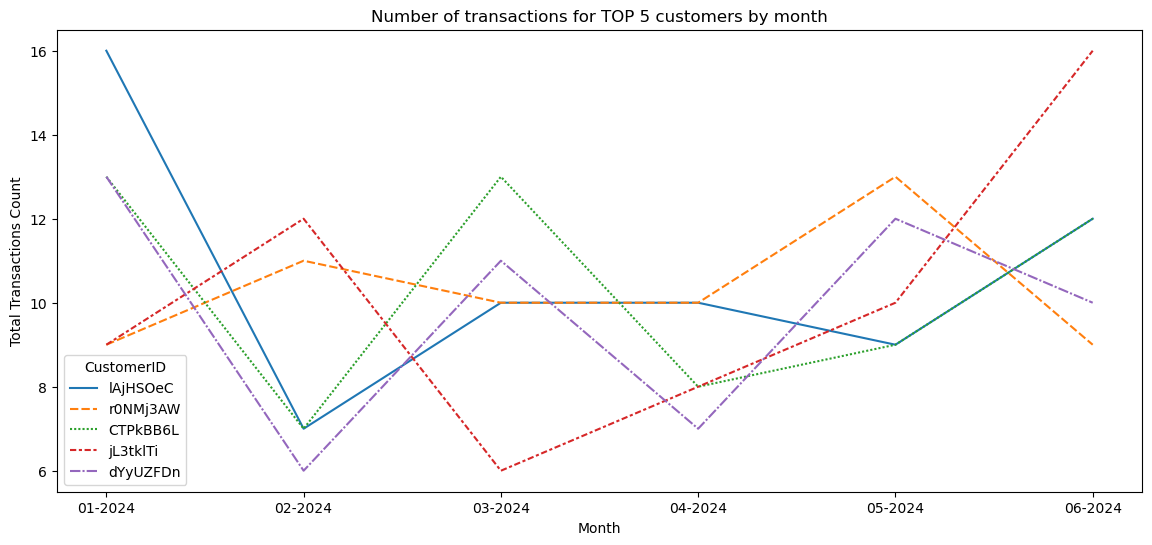

In [192]:
# Vizualisation TOP 5 customers by number of transactions
plt.figure(figsize=(14, 6))
plt.title("Number of transactions for TOP 5 customers by month")
plt.xlabel('Month')  
plt.ylabel('Total Transactions Count')  
sns.lineplot(data=monthly_transaction_counts_TOP5_no_total)
plt.show()

In [48]:
# PIVOT TABLE Grouping Products by TotalAmount, by indicating monthly sales

monthly_data_products = df.groupby('ProductID')['TotalAmount'].resample('M').sum().reset_index(name='TotalAmount')
monthly_data_products['Date'] = monthly_data_products['Date'].dt.strftime('%m-%Y')

pivot_table = monthly_data_products.pivot_table(index='ProductID', columns ='Date',
                                       values = 'TotalAmount', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
monthly_data_products = pivot_table[[*pivot_table.columns[:-1], 'Total']]
monthly_data_products.sort_values(by='Total', ascending=False, inplace=True)
print("Montly sales Amount per Product")
monthly_data_products.head()

Montly sales Amount per Product


Date,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,Total
ProductID,,,,,,,
96425,21806.88,14425.22,28349.69,3031.75,19433.87,12390.99,99438.40
71635,3486.81,20686.21,14374.51,7183.01,19360.05,24969.70,90060.29
49432,0.00,18078.15,4755.70,20124.20,13956.99,30247.40,87162.44
09504,22726.82,16046.01,4895.82,897.25,24517.24,12269.11,81352.25
59221,17697.08,11318.62,8718.01,1540.40,21987.23,19528.55,80789.89


In [50]:
# Identification of the TOP 5 products by quantity sold
ProductID_counts = df['ProductID'].value_counts()
top_5_ProductID_counts = ProductID_counts.head(5)
top_5_Products = top_5_ProductID_counts.index
top_5_Products_total_amount = df.groupby('ProductID')['TotalAmount'].sum()
top_5_products_df= pd.DataFrame ({
        'ProductID' : top_5_Products, 
        'Total sold Amount': top_5_Products_total_amount[top_5_Products].values,
        'Total sold Quantity': top_5_ProductID_counts.values
})
print('TOP 5 Products')
top_5_products_df

TOP 5 Products


,ProductID,Total sold Amount,Total sold Quantity
0,64530,51709.96,31
1,96425,99438.40,31
2,23140,58743.26,31
3,83215,70960.38,30
4,59221,80789.89,30


In [52]:
# Identification of low selling 5 products and sales amounts
ProductID_counts = df['ProductID'].value_counts()
low_selling_5_ProductID_counts = ProductID_counts.tail(5)
low_selling_5_Products = top_5_ProductID_counts.index
low_selling_5_Products_total_amount = df.groupby('ProductID')['TotalAmount'].sum()
low_selling_5_products_df= pd.DataFrame ({
        'ProductID' : low_selling_5_Products , 
        'Total sold Amount': low_selling_5_Products_total_amount[low_selling_5_Products].values,
        'Total sold Quantity': low_selling_5_ProductID_counts.values
})
print('low selling 5 Products')
low_selling_5_products_df

low selling 5 Products


,ProductID,Total sold Amount,Total sold Quantity
0,64530,51709.96,14
1,96425,99438.40,14
2,23140,58743.26,13
3,83215,70960.38,12
4,59221,80789.89,12


In [72]:
# Grouping by ProductID and calculating the average Price and Quantity
averages = df.groupby('ProductID').agg({'Price': 'mean', 'Quantity': 'mean'}).reset_index()

# Rounding the results
averages['Price'] = averages['Price'].round(2)
averages['Quantity'] = averages['Quantity'].round(0)

# Renaming the columns 
averages.columns = ['ProductID', 'AveragePrice', 'AverageQuantity']

# Sorting by average Quantity
sorted_averages = averages.sort_values(by = 'AverageQuantity', ascending= False).reset_index(drop=True)

sorted_averages

,ProductID,AveragePrice,AverageQuantity
0,71635,50.63,64.0
1,49432,53.55,62.0
2,42574,49.94,61.0
3,72336,66.23,60.0
4,24881,52.42,60.0
...,...,...,...
90,50985,57.41,40.0
91,03451,42.50,39.0
92,18738,54.02,38.0
93,10101,48.37,38.0


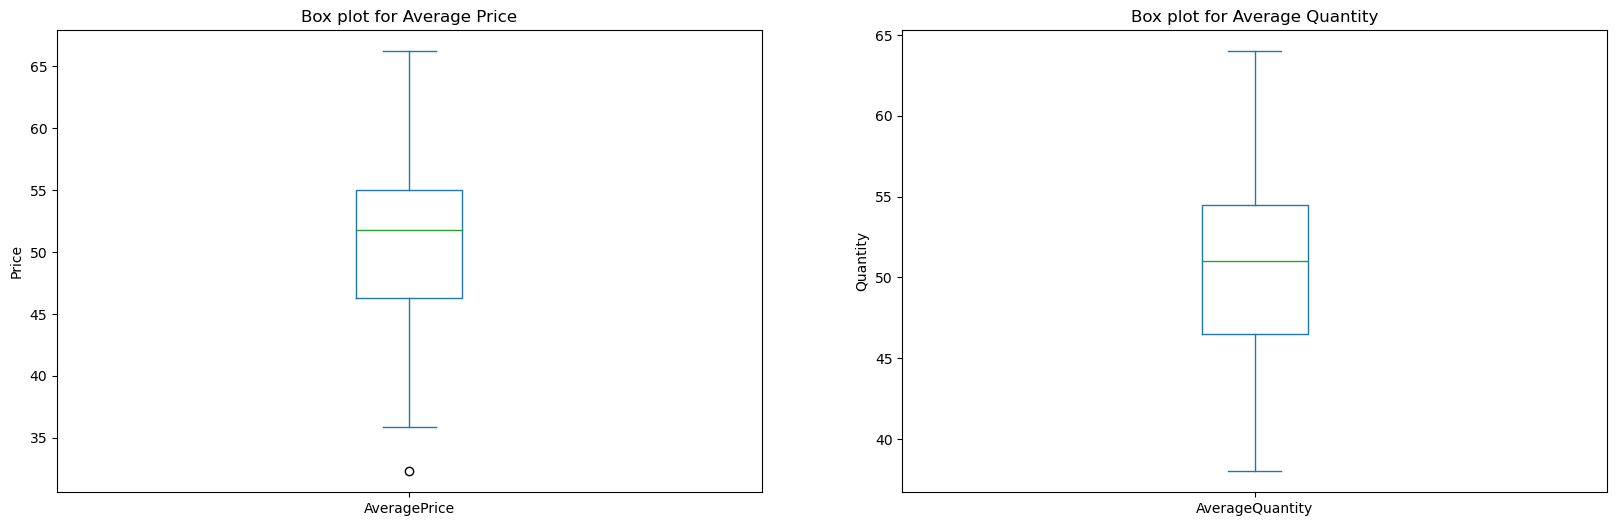

In [74]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
sorted_averages['AveragePrice'].plot(kind='box', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box plot for Average Price')
#ax0.set_xlabel('Average Price')
ax0.set_ylabel('Price')

# Subplot 2: Box plot
sorted_averages['AverageQuantity'].plot(kind='box', figsize=(20, 6),  ax=ax1) # add to subplot 1
ax1.set_title('Box plot for Average Quantity')
#ax1.set_xlabel('Average Quantity')
ax1.set_ylabel('Quantity')

plt.show()

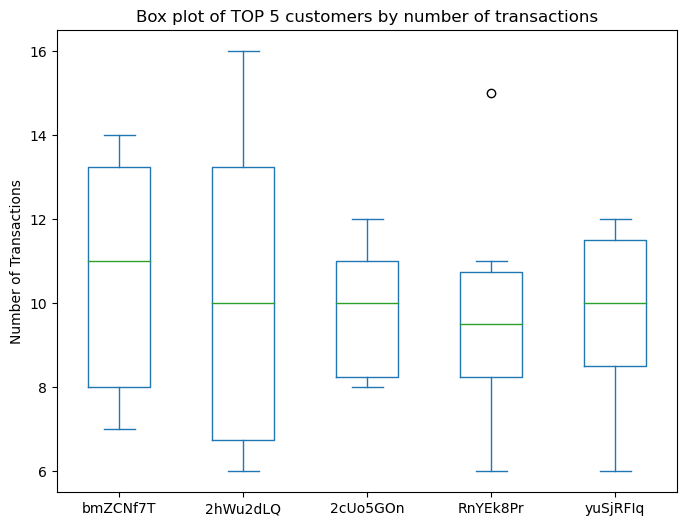

In [56]:
monthly_transaction_counts_TOP5_no_total.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of TOP 5 customers by number of transactions')
plt.ylabel('Number of Transactions')

plt.show()

(0.0, 116.20987379482129)

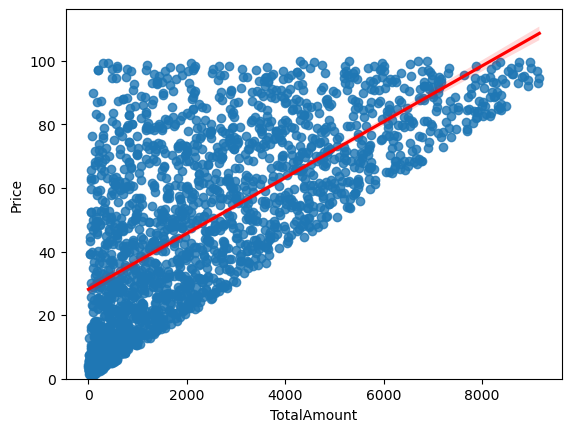

In [100]:
sns.regplot(x="TotalAmount", y="Price", data=df, line_kws={"color": "red"})
plt.ylim(0,)

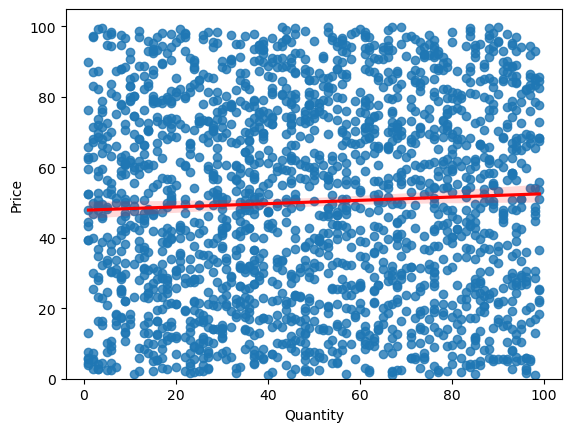

In [98]:
sns.regplot(x="Quantity", y="Price", data=df, line_kws={"color": "red"})
plt.ylim(0,)
plt.show()

In [62]:
product_counts = df['ProductID'].value_counts().to_frame()
product_counts.rename(columns={'ProductID': 'value_counts'}, inplace=True)
product_counts

,count
ProductID,
64530,31
96425,31
23140,31
83215,30
59221,30
...,...
62625,14
85984,14
12548,13


In [210]:
#Calculation of corration coefient  for Quantity,	TotalAmount,	Price
df[['Quantity','TotalAmount', 'Price']].corr()

,Quantity,TotalAmount,Price
Quantity,1.000000,0.666899,-0.006495
TotalAmount,0.666899,1.000000,0.640621
Price,-0.006495,0.640621,1.000000


<Axes: title={'center': 'Histogram of Price'}, xlabel='Price', ylabel='Count'>

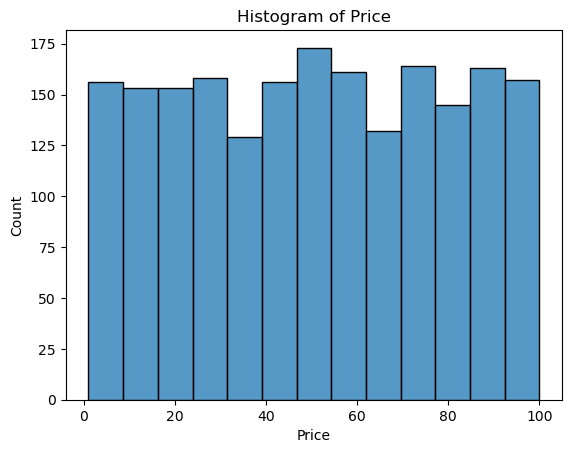

In [64]:
#Distribution of prices within a data set
plt.title('Histogram of Price')
sns.histplot(df['Price'])

<Axes: title={'center': 'Histogram of Quantity'}, xlabel='Quantity', ylabel='Count'>

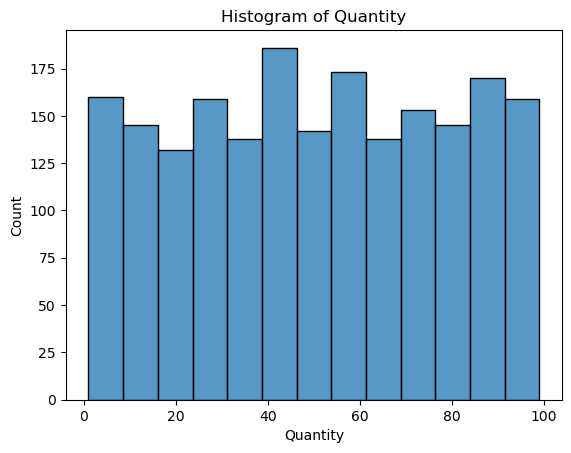

In [76]:
#Distribution of quantity within a data set
plt.title('Histogram of Quantity')
sns.histplot(df['Quantity'])